In [10]:
# example for reading GPM L3 data for IWP
import h5py
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math as m

In [11]:
dir = '/home/dudavid/Dendrite/gpm_l3/'
#file = dir+'3A-CLIM-MO.GCOMW1.AMSR2.GRID2017R1.20170101-S000000-E235959.01.V05A.HDF5'
fii = '3A-CLIM-DAY.GPM.GMI.GRID2017R1.20160921-S000000-E235959.265.V05A.HDF5'
file = dir+fii

In [12]:
f = h5py.File(file,'r')
#f = h5py.File(fileName,  "r")
#   ...: for item in f.attrs.keys():
#   ...:     print(item + ":", f.attrs[item])
iw = f['Grid/iceWaterPath']
iwp = np.transpose(np.array(iw))
#mask = iwp<0
#iwp[mask] = 0


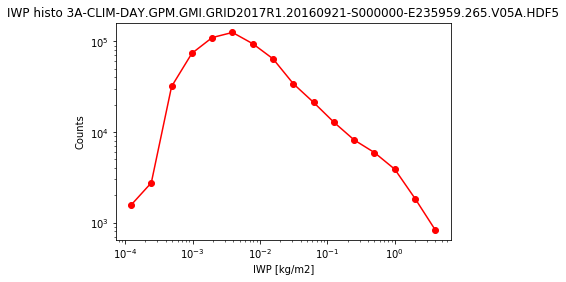

In [14]:
# create histogram of IWP

#b = np.histogram(iwp,bins=[0.001,.005,.01,.05,.1,.5,1,2,4,8])
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]
binz = [2**x for x in range(-14,3)]
hist, bin_edges = np.histogram(iwp,bins=binz)
#print(hist)
#print(np.size(mask))
#print(bin_edges)
#print(hist.sum())
fig = plt.figure()
ax = fig.add_subplot(111)

np.size(iwp)
#type(iwp)
numbins = len(hist)
#ax.hist(iwp,numBins,color='green')#,alpha=0.8)
plt.plot(binz[1:],hist,'r-o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('IWP [kg/m2]')
plt.ylabel('Counts')
plt.title('IWP histo '+fii)
plt.show()

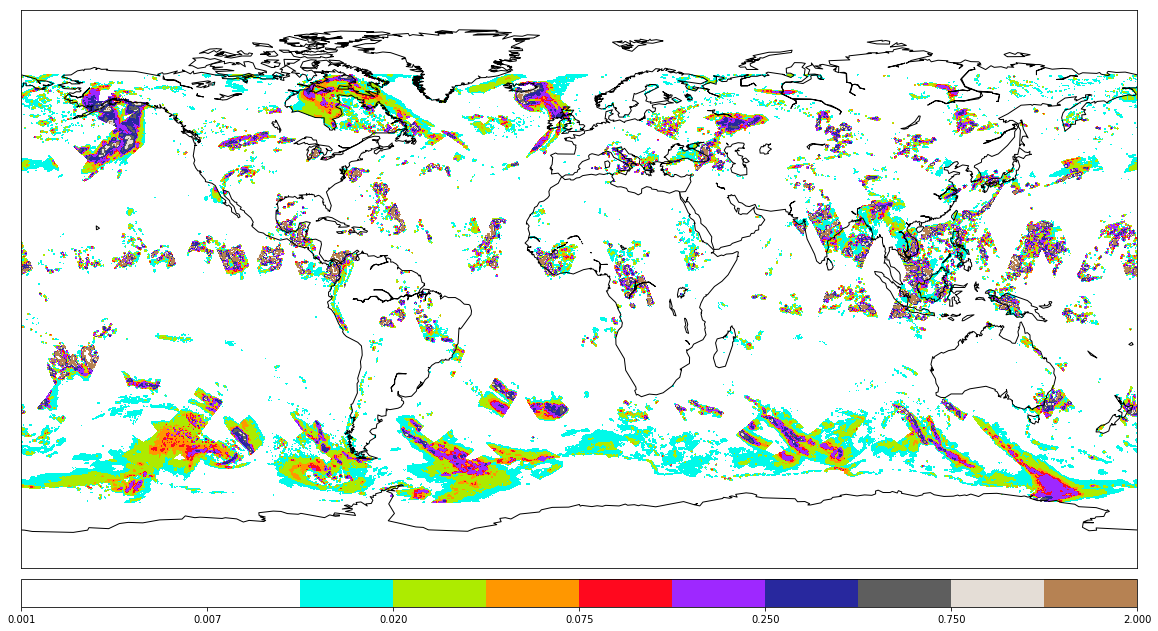

In [5]:
fig = plt.figure(figsize=[20,25])
m = Basemap(projection='cyl',lon_0=0)#,lat_0=0,resolution='l')
lons, lats = m.makegrid(1440,720)
x, y = m(lons, lats)
#m.fillcontinents(color='coral')#,lake_color='aqua')
m.drawcoastlines()
#iwpp = 1000.0*iwp[:]
#clevs = [0,.25,.5,1,2.5,5,10,15,25,50,75,100,150,250,500,750,1000,1500,2000]
#clevs = [0.0001,.0002,.0004,.0007,.001,0.002,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0]
clevs = [.001,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0,2.0]
#clevs = [.002,0.004,.006,.008,0.01,.02,.04,.06,.08,.1,.2,.3,.4,.8]
cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap=cm.s3pcpn)
#cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap='PuBu_r')
#cs = m.hexbin(x,y,iwp)
cbar = m.colorbar(cs,location='bottom')
plt.show()